# Plot matern correlation lengths

In [1]:
import os
from copy import copy

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cmocean
from xmitgcm import open_mdsdataset,utils
from xgcm import Grid
from MITgcmutils import rdmds,wrmds
import ecco_v4_py

import rosypig as rp
import pych.pigmachine as pm
import pych.ecco as pe

from smooth_store import open_smoothdataset

/scratch2/tsmith/miniconda3/envs/phd/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
fig_dir = '../figures'
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)

In [3]:
plt.style.use('thesis')

In [4]:
kw = {'iters':None, 'geometry':'llc'}

In [5]:
ds = open_mdsdataset('/scratch2/tsmith/generic-matern-covariance/sampling/llc90/grid/', **kw)

/home/tsmith/xmitgcm/xmitgcm/mds_store.py:922: UserWarning: Couldn't find available_diagnostics.log in /scratch2/tsmith/generic-matern-covariance/sampling/llc90/grid/ or /scratch2/tsmith/generic-matern-covariance/sampling/llc90/grid/. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "


In [6]:
tw = rp.ControlField('theta', ds.maskC)
tw

ControlField: theta
   grid_loc: C
   field_type: genarr4d
   n_wet: 2406992
   n_recs: 1
   mask name: theta_mask

In [7]:
xi = 1
smoothOpNb=1

In [12]:
dslist = []
n_range = [5,10]
for Nx in n_range:
    run_dir = \
        f'/scratch2/tsmith/generic-matern-covariance/sampling/llc90/sample-3D-C/run.{Nx:02}dx.{xi:02}xi'
    ds = open_smoothdataset(run_dir, xdalike=ds.maskC, **kw)
    ds['variance'] = 1/ds['smooth3Dnorm001']**2
    ds['sigma'] = 1/ds['smooth3Dnorm001']
    
    ds['variance'].attrs = {'label':r'$\hat{\sigma}^2$'}
    ds['sigma'].attrs = {'label':r'$\hat{\sigma}$'}
    dslist.append(ds)
    
    
ds = xr.concat(dslist, dim='n_range')
ds['n_range'] = xr.DataArray(n_range, coords={'n_range':n_range},dims='n_range')

/home/tsmith/xmitgcm/xmitgcm/mds_store.py:922: UserWarning: Couldn't find available_diagnostics.log in /scratch2/tsmith/generic-matern-covariance/sampling/llc90/sample-3D-C/run.05dx.01xi or /scratch2/tsmith/generic-matern-covariance/sampling/llc90/sample-3D-C/run.05dx.01xi. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "
/home/tsmith/xmitgcm/xmitgcm/mds_store.py:922: UserWarning: Couldn't find available_diagnostics.log in /scratch2/tsmith/generic-matern-covariance/sampling/llc90/sample-3D-C/run.10dx.01xi or /scratch2/tsmith/generic-matern-covariance/sampling/llc90/sample-3D-C/run.10dx.01xi. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "


In [13]:
ds

,Array,Chunk
Bytes,40.17 MiB,411.33 kiB
Shape,"(2, 50, 13, 90, 90)","(1, 1, 13, 90, 90)"
Count,3000 Tasks,100 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,40.17 MiB,411.33 kiB
Shape,"(2, 50, 13, 90, 90)","(1, 1, 13, 90, 90)"
Count,3000 Tasks,100 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


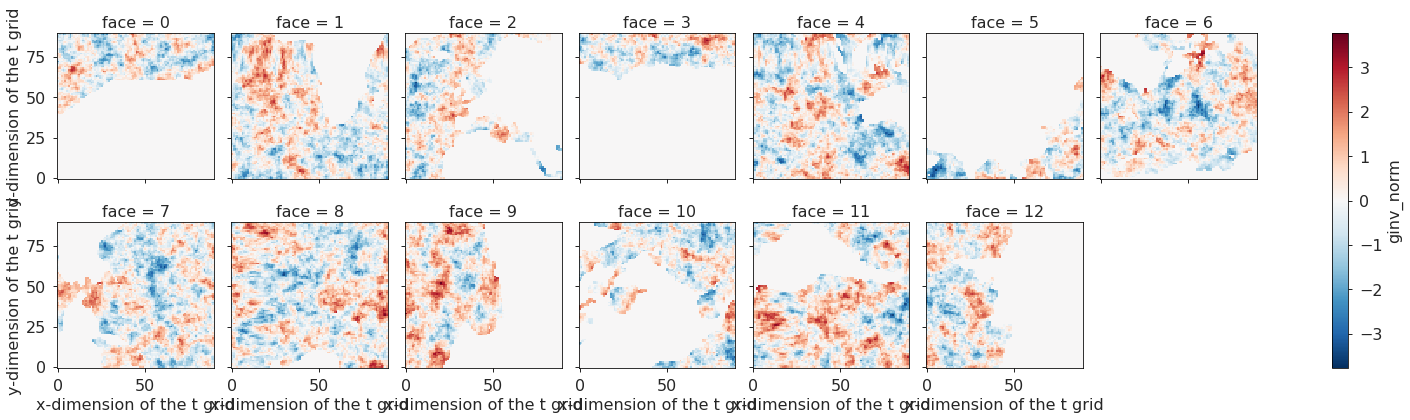

In [19]:
ds.ginv_norm.sel(n_range=10, sample=10, k=0).plot(col='face', col_wrap=7)

In [15]:
llcmap =pe.atlantic_map(ds, dx=1., dy=1.)

<GeoAxesSubplot:>

/scratch2/tsmith/miniconda3/envs/phd/lib/python3.9/site-packages/matplotlib/colors.py:621: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


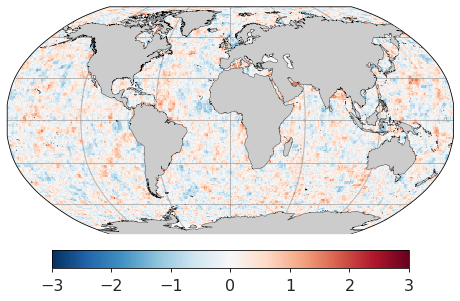

In [20]:
llcmap(ds.smooth3Dfld001.sel(n_range=5, sample=0,k=0), lon_bds=[-179,179], lat_bds=[-89,89], vmax=3)

In [18]:
xda = xr.where(ds.maskC, ds.smooth3Dfld001*ds.smooth3Dnorm001, np.nan)

In [ ]:
xda.plot

### Correlation lengths

In [13]:
bb = xr.DataArray(a,coords={'a':a},dims='a')

In [14]:
bb

<xarray.DataArray (a: 31)>
array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
        -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  12,  13,  14,  15])
Coordinates:
  * a        (a) int64 -15 -14 -13 -12 -11 -10 -9 -8 ... 8 9 10 11 12 13 14 15

In [10]:
for dim in ['i']:
    for s in [-15]:
        ydev = xdev.shift({dim:np.int64(s).astype(int)})

NameError: name 'xdev' is not defined

In [11]:
llcmap(xdev.shift({'i':np.int64(-15)}).isel(sample=0,k=0))

NameError: name 'xdev' is not defined

In [11]:
cdsd = {}
for Nx in dsd.keys():
    # Compute approximate correlation
    cdsd[Nx] = pm.matern.calc_correlation_field(dsd[Nx]['ginv_norm'].reset_coords(drop=True),
                                                mask=tw.mask.reset_coords(drop=True),
                                                dimlist=['i'], #,'j','k'],
                                                n_shift=15)
    
    mf = pm.newmatern.MaternField(tw.mask, n_range=Nx, horizontal_factor=xi)
    # Compute prediction
    cdsd[Nx]['dist'] = np.abs(cdsd[Nx].shifty)
    cdsd[Nx]['delta_ihat'] = cdsd[Nx]['dist'] / xi
    cdsd[Nx]['delta_jhat'] = cdsd[Nx]['dist'] / xi
    cdsd[Nx]['delta_khat'] = cdsd[Nx]['dist'].copy(deep=True)
    cdsd[Nx]['predicted_i'] = mf.ideal_correlation(distance=cdsd[Nx]['delta_xhat'])
    cdsd[Nx]['predicted_j'] = mf.ideal_correlation(distance=cdsd[Nx]['delta_yhat'])
    cdsd[Nx]['predicted_k'] = mf.ideal_correlation(distance=cdsd[Nx]['delta_zhat'])

dim:  i


/scratch2/tsmith/miniconda3/envs/py38_tim/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch2/tsmith/miniconda3/envs/py38_tim/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch2/tsmith/miniconda3/envs/py38_tim/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch2/tsmith/miniconda3/envs/py38_tim/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch2/tsmith/miniconda3/envs/py38_tim/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in ar

dim:  i


/scratch2/tsmith/miniconda3/envs/py38_tim/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch2/tsmith/miniconda3/envs/py38_tim/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch2/tsmith/miniconda3/envs/py38_tim/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch2/tsmith/miniconda3/envs/py38_tim/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/scratch2/tsmith/miniconda3/envs/py38_tim/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in ar

<GeoAxesSubplot:>

/scratch2/tsmith/miniconda3/envs/py38_tim/lib/python3.8/site-packages/matplotlib/colors.py:576: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


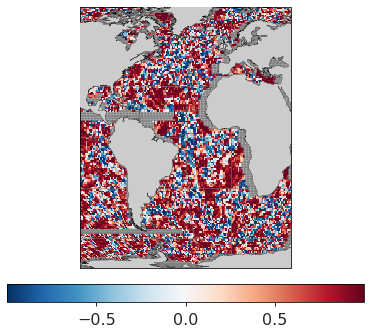

In [18]:
llcmap(cdsd[10].corr_i.sel(shifty=-5,k=0))

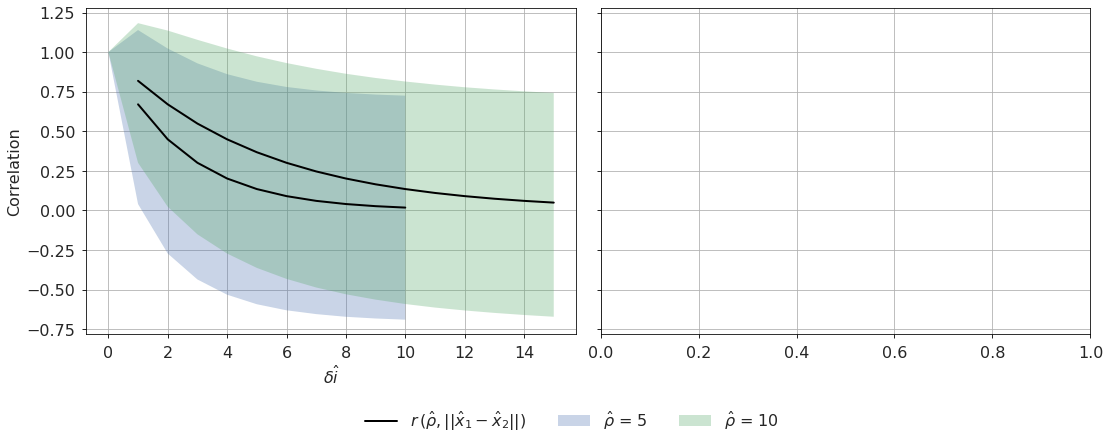

In [22]:
ncols = 2
nrows = 1

fig,axs = plt.subplots(nrows,ncols,figsize=(18,6*nrows),
                       sharey=True)

for dim,stopper,ax in zip(['i'],[xi,1],axs):
    for Nx,xds in cdsd.items():
        
        #label = 'Predicted' if dim == 'YC' and Nx == 5 else None
        label = r'$r\,(\hat{\rho},||\hat{x}_1-\hat{x}_2||)$' if dim == 'i' and Nx ==5 else None
        
        xds = xds.sel(shifty=slice(0,2*stopper*Nx))
        xaxis = xds.delta_xhat if dim == 'i' else xds.delta_zhat
        
        plotme=xds[f'predicted_xc']#{dim.lower()}']
        #plotme.plot(ax=ax,label=label,color='black')
        ax.plot(xaxis, plotme,label=label,color='black')
    
        fld = f'corr_{dim.lower()}'
        domain_avg = xds[fld].mean(['face','i','j','k'])
        domain_std = xds[fld].std(['face','i','j','k'])
        
        #label=r'Domain avg $\pm \sigma$'
        label=r'$\hat{\rho}$ = %d' % Nx
        label = label if dim == 'i' else None
        ax.fill_between(xaxis,
                        domain_avg-domain_std,
                        domain_avg+domain_std,
                        alpha=.3,
                        label=label)
    
    #text = '(a) Latitude' if dim == 'YC' else '(b) Depth'
    #ax.text(-12.5,.9,text,ha='center')
        
    ax.set(xlabel=r'$\delta\hat{%s}$'%dim[0].lower(),ylabel='',title='')
    if dim == 'i':
        ax.set_ylabel('Correlation')
        
fig.subplots_adjust(wspace=.05)
fig.legend(ncol=5,
           loc='center',
           bbox_to_anchor=(.5,-0.075),
           frameon=False)
#fig.savefig(f'{fig_dir}/nondimensional_correlation.pdf',bbox_inches='tight',dpi=300)

## First, show a plot of some samples

In [11]:
def add_arrows(ax,Nx,xi=1):
    
    yc = float(ds.YC.sel(YC=-74.58,method='nearest'))
    yind = list(ds.YC.values).index(yc)
    
    zc = float(ds.Z.sel(Z=-800,method='nearest'))
    zind = list(ds.Z.values).index(zc)
    
    Nx0 = int(np.floor(Nx/2*xi))
    Nx1 = int(np.ceil(Nx/2*xi))
    y0 = float(ds.YC[yind-Nx0])
    y1 = float(ds.YC[yind+Nx1])
    
    Nx0 = int(np.floor(Nx/2))
    Nx1 = int(np.ceil(Nx/2))
    z0 = float(ds.Z[zind-Nx0])
    z1 = float(ds.Z[zind+Nx1])
    
    # Up and down
    arrowprops = {'width':1,'color':'white'}
    if Nx<10 and xi==1:
        arrowprops['headlength'] = 8
        arrowprops['headwidth'] = 5
    
    half = float(ds.YC.diff('YC').mean()/2) if Nx0!=Nx1 and xi!=2 else 0
    ax.annotate(text='',xy=(yc+half,z0),xytext=(yc+half,z1),
                arrowprops=arrowprops)
    ax.annotate(text='',xytext=(yc+half,z0),xy=(yc+half,z1),
                arrowprops=arrowprops)
    
    arrowprops['headlength'] = 8
    if Nx<=10 and xi == 1:
        arrowprops['headlength'] = 3
        arrowprops['headwidth'] = 5
        
    half = float(ds.Z.diff('Z').mean()/2) if Nx0!=Nx1 else 0
    ax.annotate(text='',xy=(y0,zc+half),xytext=(y1,zc+half),
                arrowprops=arrowprops)
    ax.annotate(text='',xytext=(y0,zc+half),xy=(y1,zc+half),
                arrowprops=arrowprops)

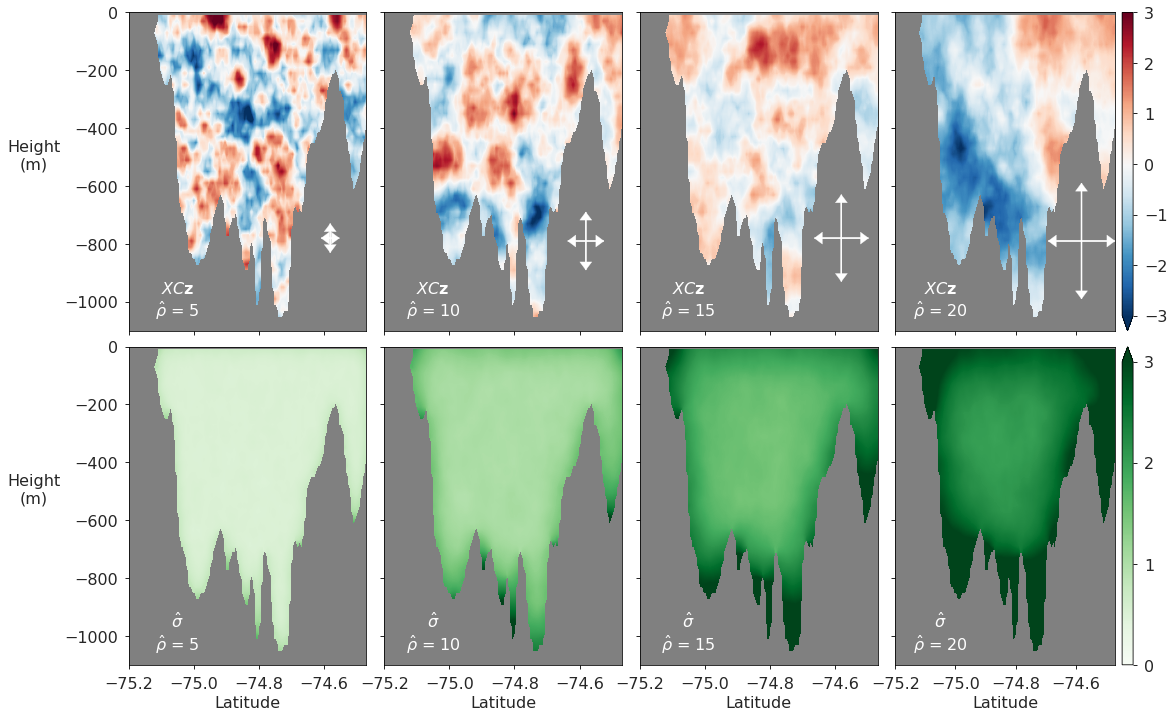

In [12]:
ncols = len(dsd.keys())
nrows = 2
fig,axs = plt.subplots(nrows,ncols,figsize=(18,6*nrows),
                       sharey=True, sharex=True)

for fld,cmap,vmax,vmin,axr in zip(['ginv_norm','sigma'],
                               ['RdBu_r','Greens'],
                               [3,3],
                                    [-3,0],
                                axs):
    
    for (Nx,xds),ax in zip(dsd.items(),axr):
        plotme = xds[fld].sel(sample=60) if 'sample' in xds[fld].dims else xds[fld]
        plotme = plotme.where(tw.mask)
        p = plotme.plot.contourf(ax=ax,vmax=vmax,vmin=vmin,
                                 add_colorbar=False,
                                 levels=250,
                                 cmap=cmap)
        # labels
        ax.set(ylabel='',xlabel='',title='',
               xlim=[-75.2,None],ylim=[-1100,0])
        if ax.get_subplotspec().colspan[0]==0:
            ax.set_ylabel('Height\n(m)',labelpad=30,rotation=0)
        if ax.get_subplotspec().rowspan[-1]==nrows-1:
            ax.set_xlabel('Latitude')
        ax.grid(False)
        text = plotme.label + '\n'
        text += r'$\hat{\rho}$ = %d' % Nx
        ax.text(-75.05,-1050,text,
                ha='center',color='white')
        
        ax.add_patch(plt.Rectangle((ax.get_xlim()[0],ax.get_ylim()[0]),
                                   ax.get_xlim()[1]-ax.get_xlim()[0],
                                   ax.get_ylim()[1]-ax.get_ylim()[0],
                                   facecolor='gray',
                                   zorder=0)
                                )
        
        if fld == 'ginv_norm':
            add_arrows(ax,Nx,xi=xi)
            
    # Now, add colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    ticks = np.linspace(-3,3,7)
    fig.colorbar(p,cax=cax,ticks=ticks)
        
fig.subplots_adjust(wspace=.075,hspace=.05)
#fig.savefig(f'{fig_dir}/samples_and_pointwise_std.jpg',bbox_inches='tight',dpi=300)

### For defense, just two correlation length scale plots

In [13]:
def remove_tickstuff(ax):
    
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) 
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False) 

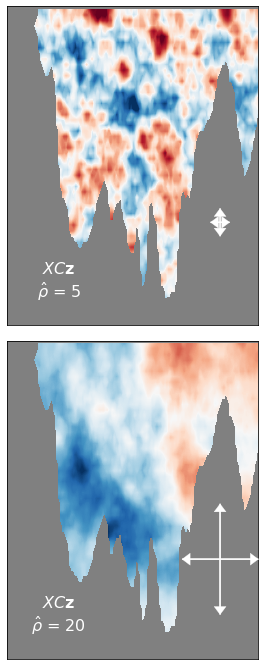

In [14]:
ncols = 1
nrows = 2
fig,axs = plt.subplots(nrows,ncols,figsize=(18/4,6*nrows),
                       sharey=True, sharex=True)

fld = 'ginv_norm'
cmap = 'RdBu_r'
vmax = 3
vmin = -3
for Nx,ax in zip([5,20],axs):
    
    plotme = dsd[Nx][fld].sel(sample=60)
    plotme = plotme.where(tw.mask)
    
    p = plotme.plot.contourf(ax=ax,vmax=vmax,vmin=vmin,
                             add_colorbar=False,
                             levels=250,
                             cmap=cmap)
    ax = pm.fix_obcsw_plot(ax)
    text = plotme.label + '\n'
    text += r'$\hat{\rho}$ = %d' % Nx
    ax.text(-75.05,-1050,text,
            ha='center',color='white')
    
    # Make it clean for big fig
    remove_tickstuff(ax)
    ax.set(xlabel='',ylabel='')
        
    # Add those arrows
    add_arrows(ax,Nx,xi=xi)
            
fig.subplots_adjust(wspace=.075,hspace=.05)
#fig.savefig(f'{fig_dir}/two_correlation_samples.jpg',bbox_inches='tight',dpi=300)

### Also for defense: compare to isotropic

In [15]:
iso = {}
for Nx in [20,100,200,600]:
    ds = pm.matern.get_matern_dataset(f'/scratch2/tsmith/pig-machine/isotest/maternC.isotropic/run.{Nx:02}dx.{xi:02}xi',
                                      smoothOpNb=smoothOpNb,
                                      xdalike=tw.mask.sortby('Z',ascending=False),
                                      sample_num=range(1000),
                                      read_filternorm=True)
    ds = ds.sortby('Z')
    ds['variance'] = 1/ds['filternorm']**2
    ds['sigma'] = 1/ds['filternorm']
    
    ds['ginv_norm'].attrs = {'label':r'$XC\mathbf{z}$'}
    ds['variance'].attrs = {'label':r'$\hat{\sigma}^2$'}
    ds['sigma'].attrs = {'label':r'$\hat{\sigma}$'}
    iso[Nx] = ds

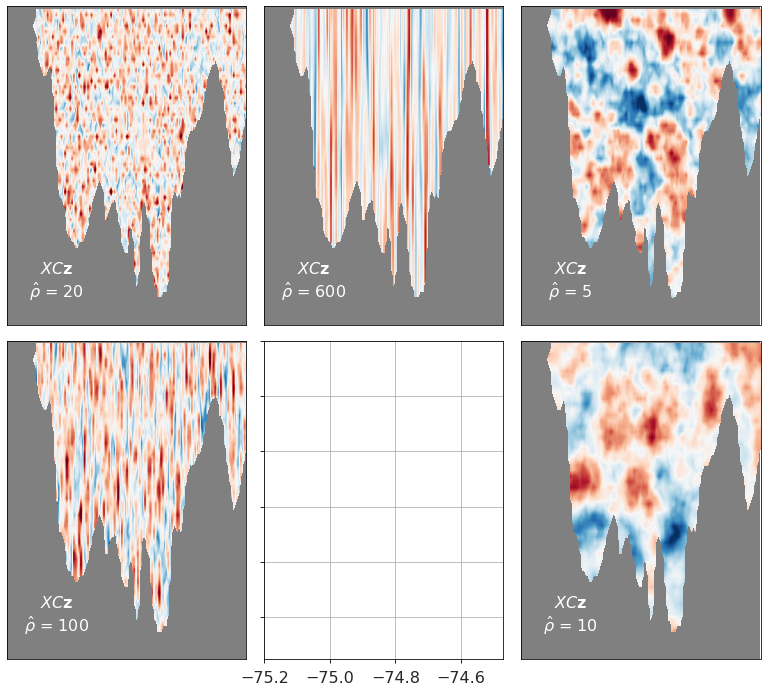

In [57]:
ncols = 3
nrows = 2
fig,axs = plt.subplots(nrows,ncols,figsize=(18/4*3,6*nrows),
                       sharey=True, sharex=True)

fld = 'ginv_norm'
cmap = 'RdBu_r'
vmax = 3
vmin = -3

for mydict, keys, axr in zip([iso,iso,dsd],
                             [[20,100], [600,],[5,10]],
                             [axs[:,0].flatten(), axs[:,1].flatten(),axs[:,2].flatten()]):
    for Nx,ax in zip(keys,axr):
        
        plotme = mydict[Nx][fld].sel(sample=60)
        plotme = plotme.where(tw.mask)
        
        p = plotme.plot.contourf(ax=ax,vmax=vmax,vmin=vmin,
                                 add_colorbar=False,
                                 levels=250,
                                 cmap=cmap)
        ax = pm.fix_obcsw_plot(ax)
        text = plotme.label + '\n'
        text += r'$\hat{\rho}$ = %d' % Nx
        ax.text(-75.05,-1050,text,
                ha='center',color='white')
        
        # Make it clean for big fig
        remove_tickstuff(ax)
        ax.set(xlabel='',ylabel='')
            
        # Add those arrows
        #add_arrows(ax,Nx,xi=xi)
            
fig.subplots_adjust(wspace=.075,hspace=.05)

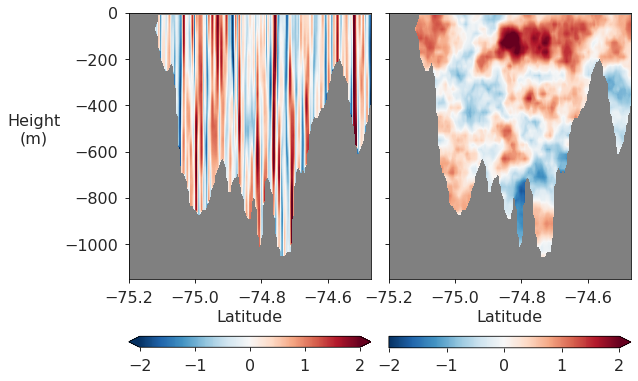

In [36]:

ncols = 2
nrows = 1

# Ok ... just going to iterate through and make each separately
fig,axs = plt.subplots(nrows,ncols,figsize=(18/2,7*nrows),
                       sharey=True, sharex=True)

fld = 'ginv_norm'
cmap = 'RdBu_r'
vmax = 2
vmin = -2

cbkw = {'ticks':np.linspace(vmin,vmax,5),
        'orientation':'horizontal',
        'label':'',
        }
        
for ii,(xda, ax) in enumerate(zip([iso[600],dsd[15]],axs.flatten())):
        
    plotme = xda[fld].sel(sample=60)
    plotme = plotme.where(tw.mask)
    
    p = plotme.plot.contourf(ax=ax,vmax=vmax,vmin=vmin,
                             levels=250,
                             cmap=cmap,
                             cbar_kwargs=cbkw)
        
    ax = pm.fix_obcsw_plot(ax)
    ax.set(xlabel='Latitude')
    
axs[-1].set(ylabel='')
# Now, add colorbar
#divider = make_axes_locatable(ax)
#cax = divider.append_axes('right', size='5%', pad=0.1)
#ticks = np.linspace(vmin,vmax,7)
#fig.colorbar(p,cax=cax,ticks=ticks)
            
fig.subplots_adjust(wspace=.075,hspace=.05)
fig.savefig(f'{fig_dir}/isotropic_vs_anisotropic_forms.jpg', dpi=300, bbox_inches='tight')

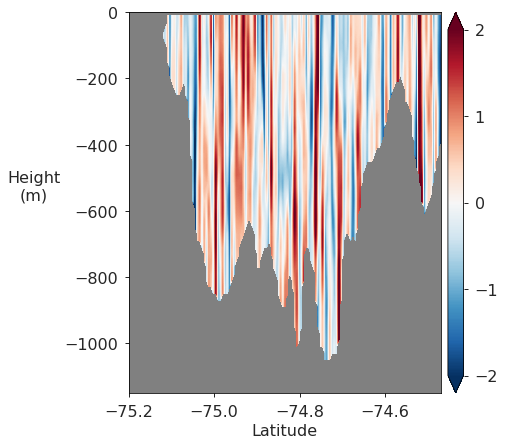

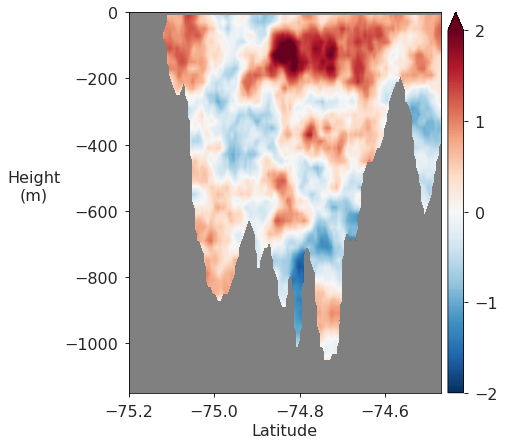

In [57]:
fld = 'ginv_norm'
cmap = 'RdBu_r'
vmax = 2
vmin = -2
cbkw = {'ticks':np.linspace(vmin,vmax,5),
        'orientation':'vertical',
        'label':'',
        }

for plotnum,xda in enumerate([iso[600],dsd[15]]): 
    
    fig,ax = plt.subplots(figsize=(6,7))
    plotme = xda[fld].sel(sample=60)
    plotme = plotme.where(tw.mask)
    p = plotme.plot.contourf(ax=ax,vmax=vmax,vmin=vmin,
                             levels=250,
                             cmap=cmap,
                             add_colorbar=False)
        
    ax = pm.fix_obcsw_plot(ax)
    ax.set(xlabel='Latitude')
    
    # Now, add colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    ticks = np.linspace(vmin,vmax,5)
    fig.colorbar(p,cax=cax,ticks=ticks)
    
    fig.savefig(f'{fig_dir}/isotropic_vs_anisotropic_forms{plotnum}.jpg', dpi=300, bbox_inches='tight')

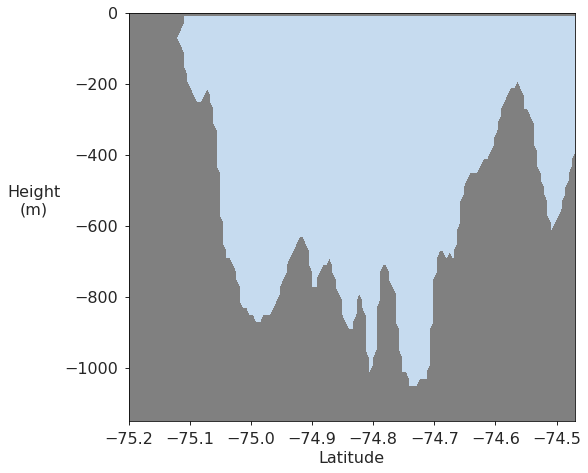

In [50]:
# Ok ... just going to iterate through and make each separately
fig,ax = plt.subplots(figsize=(8,7.5))

plotme = 0*xds['ginv'].isel(sample=0).where(tw.mask)
plotme.plot.contourf(ax=ax,vmax=2,vmin=-1,levels=10,cmap='Blues',
            add_colorbar=False)
ax = pm.fix_obcsw_plot(ax)
fig.savefig(f'{fig_dir}/blue_open_boundary.jpg',dpi=300,bbox_inches='tight')
#ax.tick_params(labelleft=False,labelbottom=False)
#fig.subplots_adjust(wspace=.075,hspace=.05)
#fig.savefig(f'{fig_dir}/isotropic_vs_anisotropic_forms.jpg', dpi=300, bbox_inches='tight')

### Compute correlation lengths

Compute the Pearson's Correlation Coefficient for a sample (the 1000 random samples being the statistical sample 
size).
This is the covariance normalized by the standard deviations at each location.

$$ r_{xy} =
    \dfrac{\sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})}
            {\sqrt{ \sum_{i=1}^{N}(x_i-\bar{x})^2}
             \sqrt{ \sum_{i=1}^{N}(y_i-\bar{y})^2}}
$$ 

where I'm calling $x$ the values of the centered dataset, $y$ is shifted in either direction.

In [ ]:
mf.ide

/home/tsmith/pych/pych/ecco/llcmap.py:65: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad(color='gray',alpha=.6)


<GeoAxesSubplot:>

/scratch2/tsmith/miniconda3/envs/py38_tim/lib/python3.8/site-packages/matplotlib/colors.py:576: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


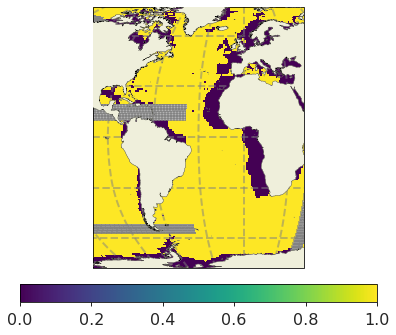

In [29]:
llcmap((1*tw.mask).shift({'i':-10}).isel(k=0))

In [30]:
cdsd = {}
for Nx in dsd.keys():
    # Compute approximate correlation
    cdsd[Nx] = pm.matern.calc_correlation_field(dsd[Nx]['ginv_norm'],
                                                mask=tw.mask,
                                                dimlist=['i'], #,'j','k'],
                                                n_shift=15)
    
    mf = pm.newmatern.MaternField(tw.mask, n_range=Nx, horizontal_factor=xi)
    # Compute prediction
    cdsd[Nx]['dist'] = np.abs(cdsd[Nx].shifty)
    cdsd[Nx]['delta_xhat'] = cdsd[Nx]['dist'] / xi
    cdsd[Nx]['delta_yhat'] = cdsd[Nx]['dist'] / xi
    cdsd[Nx]['delta_zhat'] = cdsd[Nx]['dist'].copy(deep=True)
    cdsd[Nx]['predicted_xc'] = mf.ideal_correlation(distance=cdsd[Nx]['delta_xhat'])
    cdsd[Nx]['predicted_yc'] = mf.ideal_correlation(distance=cdsd[Nx]['delta_yhat'])
    cdsd[Nx]['predicted_z'] = mf.ideal_correlation(distance=cdsd[Nx]['delta_zhat'])

ValueError: Invalid value for `pad_width`

### Plot specific points

In [51]:
pt1 = {'YC':-74.75, 'Z':-500}
pt2 = {'YC':-75, 'Z':-500}
pt3 = {'YC':-75.03, 'Z':-500}
ptlist = [pt1,pt2,pt3]

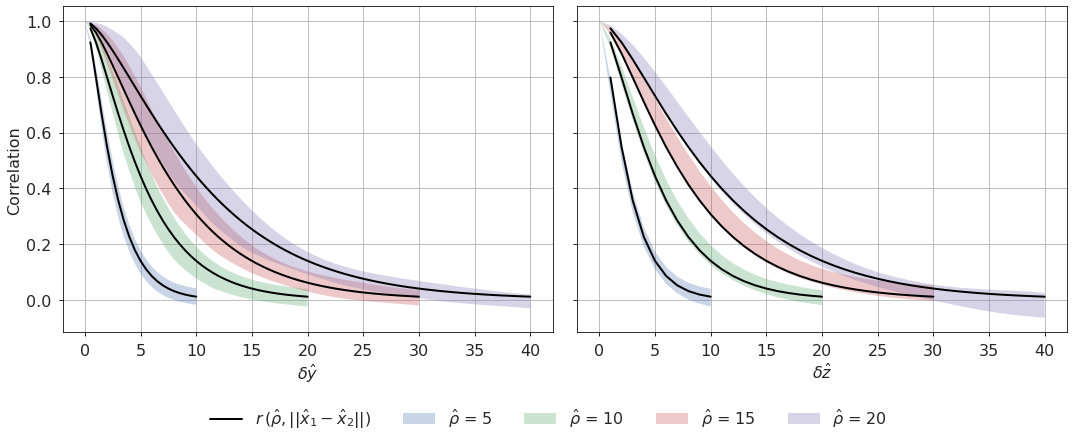

In [60]:
ncols = 2
nrows = 1

fig,axs = plt.subplots(nrows,ncols,figsize=(18,6*nrows),
                       sharey=True)

for dim,stopper,ax in zip(['YC','Z'],[xi,1],axs):
    for Nx,xds in cdsd.items():
        
        #label = 'Predicted' if dim == 'YC' and Nx == 5 else None
        label = r'$r\,(\hat{\rho},||\hat{x}_1-\hat{x}_2||)$' if dim == 'YC' and Nx ==5 else None
        
        xds = xds.sel(shifty=slice(0,2*stopper*Nx))
        xaxis = xds.delta_yhat if dim == 'YC' else xds.delta_zhat
        
        plotme=xds[f'predicted_{dim.lower()}']
        #plotme.plot(ax=ax,label=label,color='black')
        ax.plot(xaxis, plotme,label=label,color='black')
    
        fld = f'corr_{dim.lower()}'
        domain_avg = xds[fld].mean(['YC','Z'])
        domain_std = xds[fld].std(['YC','Z'])
        
        #label=r'Domain avg $\pm \sigma$'
        label=r'$\hat{\rho}$ = %d' % Nx
        label = label if dim == 'YC' else None
        ax.fill_between(xaxis,
                        domain_avg-domain_std,
                        domain_avg+domain_std,
                        alpha=.3,
                        label=label)
    
    #text = '(a) Latitude' if dim == 'YC' else '(b) Depth'
    #ax.text(-12.5,.9,text,ha='center')
        
    ax.set(xlabel=r'$\delta\hat{%s}$'%dim[0].lower(),ylabel='',title='')
    if dim == 'YC':
        ax.set_ylabel('Correlation')
        
fig.subplots_adjust(wspace=.05)
fig.legend(ncol=5,
           loc='center',
           bbox_to_anchor=(.5,-0.075),
           frameon=False)
fig.savefig(f'{fig_dir}/nondimensional_correlation.pdf',bbox_inches='tight',dpi=300)

### Note that the x-axis in this plot needs to be updated to be $\delta\hat{y}$ and $\delta\hat{z}$

In [52]:
#nrows=2
#ncols=len(cdsd.keys())
#fig,axs = plt.subplots(nrows,ncols,figsize=(18,5*nrows))
#
#for dim,axr in zip(['YC','Z'],axs):
#    for (Nx,xds),ax in zip(cdsd.items(),axr):
#        fld = f'corr_{dim.lower()}'
#        plotme = xds[f'predicted_{dim.lower()}']
#        plotme.plot(ax=ax,label=None,color='black')
#        
#        for pt in ptlist:
#            plotme = xds[fld].sel(**pt,method='nearest')
#            label = r'%.2f$^\circ$W, %d m' % (float(np.abs(plotme.YC)),float(np.abs(plotme.Z)))
#            label = label if dim == 'YC' and Nx == 20 else None
#            plotme.plot(ax=ax,label=label)
#        
#        text = '(a) Latitude' if dim == 'YC' else '(b) Depth'
#        #ax.text(-12.5,.9,text,ha='center')
#        
#        ax.set(xlabel=r'$\hat{\rho}$',ylabel='',title='')
#        if dim == 'YC' and Nx==5:
#            ax.set_ylabel('Correlation')
#        
#fig.legend(title='Latitude, Depth',ncol=3,
#           loc='center',
#           bbox_to_anchor=(.5,-.1),
#           frameon=False)

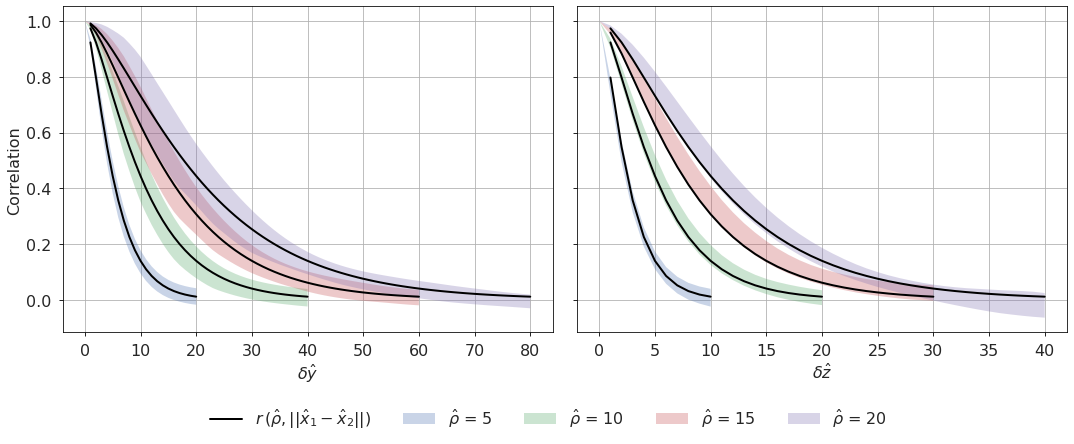